# HumanVsRobot

## Description:

* In this Project, we are chasing down robots for an online auction site. Human bidders on the site are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions. Their attempt at building a model to identify these bids using behavioral data, including bid frequency over short periods of time, has proven insufficient.

## Our Motive:

* The goal of our Project is to identify online auction bids that are placed by "robots", helping the site owners easily flag these users for removal from their site to prevent unfair auction activity.

## Something about Data:

* There are two data sets in this competition. One is a bidder data set that includes a list of bidder information, including their id, payment account, and address. The other is a bid data set that includes 7.6 million bids on different auctions. The bids in this data set are all made by mobile devices. The online auction platform has a fixed increment of dollar amount for each bid, so it doesn't include an amount for each bid.

## File descriptions:

* train.csv - the training set from the bidder dataset
* test.csv - the test set from the bidder dataset
* sampleSubmission.csv - a sample submission file in the correct format
* bids.csv - the bid dataset

# 
# Data fields

## For the bidder dataset:

1. bidder_id – Unique identifier of a bidder.
2. payment_account – Payment account associated with a bidder. These are obfuscated to protect privacy. 
3. address – Mailing address of a bidder. These are obfuscated to protect privacy. 
4. outcome – Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human. 

>The outcome was half hand labeled, half stats-based. There are two types of "bots" with different levels of proof:
* Bidders who are identified as bots/fraudulent with clear proof. Their accounts were banned by the auction site.
* Bidder who may have just started their business/clicks or their stats exceed from system wide average. There are no clear proof that they are bots.

## For the bid dataset:

1. bid_id - unique id for this bid
2. bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
3. auction – Unique identifier of an auction
4. merchandise –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement. 
5. device – Phone model of a visitor
6. time - Time that the bid is made (transformed to protect privacy).
7. country - The country that the IP belongs to
8. ip – IP address of a bidder (obfuscated to protect privacy).
9. url - url where the bidder was referred from (obfuscated to protect privacy).

# Importing all required libraries

In [1]:
import numpy as np
import sklearn.preprocessing
from sklearn_pandas import DataFrameMapper
import pandas as pd
import pickle

In [2]:
# Reading CSV's
bids = pd.read_csv("../PROJECT/bids.csv", sep=',')
test = pd.read_csv("../PROJECT/test.csv", sep=',')
train = pd.read_csv("../PROJECT/train.csv", sep=',')

# Trimming all the blank Spaces to get data in proper order
bids = bids.replace({' ': ''}, regex = True)
bids.fillna('-', inplace=True)
test = test.replace({' ': ''}, regex = True)
train = train.replace({' ': ''}, regex = True)

In [3]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,homegoods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [119]:
train.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228,ae87054e5a97a8f840a3991d12611fdc,0.0,False
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c228,92520288b50f03907041887884ba49c0,0.0,False
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b,4cb9717c8ad7e88a9a284989dd79b98d,0.0,False
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c228,2a96c3ce94b3be921e0296097b88b56a,0.0,False


In [120]:
test.head()

,bidder_id,payment_account,address,outcome
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,-1.0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,-1.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,-1.0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,-1.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,-1.0


# Basic Queries to understand the data and few counts

In [6]:
# Query to sort values by Bidder ID's and Time of the Bid in ascending order
bids_sorted = bids.sort_values(['bidder_id', 'time'], ascending = [True, True])
bids_sorted.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
3967330,3967330,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,obbny,mobile,phone420,9640018631578947,id,44.241.8.179,sj4jidex850loas


In [7]:
# Function to get last 5 alphabets from selected value (Here Payment and Address)

def address_strip(x):
    return x[0:-5]

In [8]:
# Checking the Train dataSet for Similar Address and Payment Account to get hint about Bot.

train.address = train.address.apply(address_strip)
train.payment_account = train.payment_account.apply(address_strip)
train['payment_account_prefix_same_as_address_prefix'] = train['address']==train['payment_account']

In [9]:
train.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228,ae87054e5a97a8f840a3991d12611fdc,0.0,False
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c228,92520288b50f03907041887884ba49c0,0.0,False
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b,4cb9717c8ad7e88a9a284989dd79b98d,0.0,False
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c228,2a96c3ce94b3be921e0296097b88b56a,0.0,False


In [10]:
# Count of Bidder Accounts for Similar and Not Similar Payment and Address

print("Not Similar Payment Account & Address:")
print(sum(train['payment_account_prefix_same_as_address_prefix']==False))
print("Similar Payment Account & Address:")
print(sum(train['payment_account_prefix_same_as_address_prefix']==True))

Not Similar Payment Account & Address:
1731
Similar Payment Account & Address:
282


In [11]:
# Creating a dataframe for aggregated unique Bidder ID

df_bids = pd.DataFrame(data = bids_sorted['bidder_id'].unique(), columns = ['bidder_id'],
                    index = bids_sorted['bidder_id'].unique())

In [12]:
#Count of Auctions attended by a particular Bidder ID           

counts = bids_sorted.groupby('bidder_id')['bidder_id'].agg('count')
df_bids['auction_count_num'] = counts
df_bids.head()

,bidder_id,auction_count_num
001068c415025a009fee375a12cff4fcnht8y,001068c415025a009fee375a12cff4fcnht8y,1
002d229ffb247009810828f648afc2ef593rb,002d229ffb247009810828f648afc2ef593rb,2
0030a2dd87ad2733e0873062e4f83954mkj86,0030a2dd87ad2733e0873062e4f83954mkj86,1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3
00486a11dff552c4bd7696265724ff81yeo9v,00486a11dff552c4bd7696265724ff81yeo9v,20


# Feature Engineering on DataSet

In [13]:
# Getting the Time Difference from

timediff = bids_sorted.groupby('bidder_id')['time'].diff()
timediff_str = timediff.astype(str).fillna('')
bids_sorted['timediff_num'] = timediff
bids_sorted['timediff'] = timediff_str

In [14]:
#Entering feature sequences into Text Columns
text_cols = ['auction', 'merchandise', 'device', 'timediff', 'country', 'ip', 'url']

In [15]:
#Function for Turning Feature sequence to Text column and providing unique count of each field by Bidder ID

for var in text_cols:
    bids_sorted[var] = var + "_" + bids_sorted[var].fillna("")
    text_str = var + '_text'
    count_str = var + '_nunique_num'
    df_bids[text_str] = bids_sorted.groupby('bidder_id')[var].apply(lambda x: "%s" % ' '.join(x))
    df_bids[count_str]  = bids_sorted.groupby('bidder_id')[var].nunique()

In [16]:
# To get all possible Time Related Features 

# Max. Time
max_time = bids_sorted.groupby('bidder_id')['time'].max()
df_bids['maxtime_num'] = max_time

# Min. Time
min_time = bids_sorted.groupby('bidder_id')['time'].min()
df_bids['mintime_num'] = min_time

# Max. Time Difference
max_diff = bids_sorted.groupby('bidder_id')['timediff_num'].max()
max_diff = max_diff.fillna(max_diff.mean())
df_bids['maxdiff_num'] = max_diff

# Min. Time Difference
min_diff = bids_sorted.groupby('bidder_id')['timediff_num'].max()
min_diff = min_diff.fillna(min_diff.mean())
df_bids['mindiff_num'] = min_diff

# Range(max-min) of Bidding Time
range_diff = max_diff - min_diff
df_bids['rangediff_num'] = range_diff

# Average Time Difference
mean_diff = bids_sorted.groupby('bidder_id')['timediff_num'].mean()
mean_diff = mean_diff.fillna(mean_diff.mean())
df_bids['meandiff_num'] = mean_diff

# Median Time Difference
median_diff = bids_sorted.groupby('bidder_id')['timediff_num'].median()
median_diff = median_diff.fillna(median_diff.mean())
df_bids['mediandiff_num'] = median_diff

# To get all Quartiles from 1 to 9
for q in [0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]:
    q_string = 'diff_quantile_num_' + str(q).replace('.', '_')
    q_temp = bids_sorted.groupby('bidder_id')['timediff_num'].quantile(q)
    q_temp = q_temp.fillna(q_temp.mean())
    df_bids[q_string] = q_temp

In [ ]:
df_bids.head(12)

# Another Approach by Merging Test and Train Dataset

In [18]:
test['outcome'] = -1.0
bidders = pd.concat((train, test))

# Functions

In [19]:
# Compute Stats for All Numeric fields 

def computeStatsCat(series, normalizeCount = 1.0):

    n = float(series.shape[0])
    counts = series.value_counts()

    nbUnique = counts.count() / normalizeCount
    hiFreq = counts[0] / n
    loFreq = counts[-1] / n
    argmax = counts.index[0]
    stdFreq = np.std(counts / n)

    return (nbUnique, loFreq, hiFreq, stdFreq, argmax)

In [20]:
# Computing stats of numerical series without caring about interval between Values/Accounts

def computeStatsNumNoIntervals(series):

    min = series.min()
    max = series.max()
    mean = np.mean(series)
    std = np.std(series)
    perc20 = np.percentile(series, 20)
    perc50 = np.percentile(series, 50)
    perc80 = np.percentile(series, 80)

    return (min, max, mean, std, perc20, perc50, perc80)

In [21]:
# Computing stats of a all numerical series, but this time we will consider all Intervals between Accounts

def computeStatsNum(series, copy = True):

    if copy:
        series = series.copy()

    series.sort_values()
    intervals = series[1:].as_matrix() - series[:-1].as_matrix()
    if len(intervals) < 1:
        intervals = np.array([0])

    nb = series.shape[0]
    min = series.min()
    max = series.max()
    range = max - min
    intervalsMin = np.min(intervals)
    intervalsMax = np.max(intervals)
    intervalsMean = np.mean(intervals)
    intervalsStd = np.std(intervals)
    intervals25 = np.percentile(intervals, 25)
    intervals50 = np.percentile(intervals, 50)
    intervals75 = np.percentile(intervals, 75)
    return (nb, min, max, range,
            intervalsMin, intervalsMax, intervalsMean, intervalsStd,
            intervals25, intervals50, intervals75)


In [22]:
# Computing numerical columns of Data but this time including sub-groups of Auction Column
# Also we have included Already computed values from Above functions

def computeStatsNumWithGroupBy(table, column, groupby):

    # Getting series and groups for auction(in our case)
    series = table[column]
    groups = table.groupby(groupby)

    # Getting Values from Global Stats
    (nb, min, max, range,
    intervalsMin, intervalsMax, intervalsMean, intervalsStd,
    intervals25, intervals50, intervals75) = computeStatsNum(series)

    # Creating stats by group
    X = []
    for _, group in groups:
        (grpNb, _, _, grpRange, grpIntervalsMin, grpIntervalsMax, grpIntervalsMean, grpIntervalsStd, _, _, _) = computeStatsNum(group[column])
        X.append([grpNb, grpRange, grpIntervalsMin, grpIntervalsMax, grpIntervalsMean, grpIntervalsStd])
    X = np.array(X)

    # Providing Index to every generate values
    grpNbMean = np.mean(X[:,0])
    grpNbStd = np.std(X[:,0])
    grpRangeMean = np.mean(X[:,1])
    grpRangeStd = np.std(X[:,1])
    grpIntervalsMinMin = np.min(X[:,2])
    grpIntervalsMinMean = np.mean(X[:,2])
    grpIntervalsMaxMax = np.max(X[:,3])
    grpIntervalsMaxMean = np.mean(X[:,3])
    grpIntervalsMean = np.mean(X[:,4])
    grpIntervalsMeanStd = np.std(X[:,4])
    grpIntervalsStd = np.mean(X[:,5])
    
    # Returing Above computed Values
    return (nb, min, max, range,
            intervalsMin, intervalsMax, intervalsMean, intervalsStd,
            intervals25, intervals50, intervals75,
            grpNbMean, grpNbStd, grpRangeMean, grpRangeStd,
            grpIntervalsMinMin, grpIntervalsMinMean, grpIntervalsMaxMax, grpIntervalsMaxMean,
            grpIntervalsMean, grpIntervalsMeanStd, grpIntervalsStd)

In [23]:
# Computing All Categories and finding the Probability of outcome from Each Category

def computeOutcomeProbaByCat(data, cats):
    stats = {}
    for cat in cats:
        stats[cat] = pd.DataFrame(data.groupby(cat).aggregate(np.mean).outcome)
        stats[cat].rename(columns={'outcome': cat+'Num'}, inplace=True)
    return stats

In [24]:
# Initializing Variables to Store Below Computed Data
Xids = []
X = []

# Using Above Created Functions to Create all new Fields and Storing Values Respetively in New Dataset.
for bidder, group in bids.groupby('bidder_id'):

    # Using Above Function to Compute Stats
    (nbUniqueIP, loFreqIP, hiFreqIP, stdFreqIP, IP) = computeStatsCat(group.ip)
    (nbUniqueDevice, loFreqDevice, hiFreqDevice, stdFreqDevice, device) = computeStatsCat(group.device)
    (nbUniqueMerch, loFreqMerch, hiFreqMerch, stdFreqMerch, merch) = computeStatsCat(group.merchandise)
    (nbUniqueCountry, loFreqCountry, hiFreqCountry, stdFreqCountry, country) = computeStatsCat(group.country)
    (nbUniqueUrl, loFreqUrl, hiFreqUrl, stdFreqUrl, url) = computeStatsCat(group.url)
    (nbUniqueAuction, loFreqAuction, hiFreqAuction, stdFreqAuction, auction) = computeStatsCat(group.auction)
    (auctionNb, auctionMin, auctionMax, auctionRange, auctionIntervalsMin, auctionIntervalsMax, 
    auctionIntervalsMean, auctionIntervalsStd, auctionIntervals25, auctionIntervals50, auctionIntervals75,
    auctionGrpNbMean, auctionGrpNbStd, auctionGrpRangeMean, auctionGrpRangeStd, auctionGrpIntervalsMinMin,
    auctionGrpIntervalsMinMean, auctionGrpIntervalsMaxMax, auctionGrpIntervalsMaxMean, auctionGrpIntervalsMean,
    auctionGrpIntervalsMeanStd, auctionGrpIntervalsStd) = computeStatsNumWithGroupBy(group, 'time', 'auction')
    
    # Storing Above Computed Values into X Variable that we Initialized Above
    x = [ nbUniqueIP, loFreqIP, hiFreqIP, stdFreqIP, #IP,
          nbUniqueDevice, loFreqDevice, hiFreqDevice, stdFreqDevice, #device,
          nbUniqueMerch, loFreqMerch, hiFreqMerch, stdFreqMerch, merch, #merchandise,
          nbUniqueCountry, loFreqCountry, hiFreqCountry, stdFreqCountry, country, #Country,
          nbUniqueUrl, loFreqUrl, hiFreqUrl, stdFreqUrl, #url,
          nbUniqueAuction, loFreqAuction, hiFreqAuction, stdFreqAuction, #auction,
          auctionNb, auctionMin, auctionMax, auctionRange, #auction,
          auctionIntervalsMin, auctionIntervalsMax, auctionIntervalsMean, auctionIntervalsStd, #auction,
          auctionIntervals25, auctionIntervals50, auctionIntervals75, #auction,
          auctionGrpNbMean, auctionGrpNbStd, auctionGrpRangeMean, auctionGrpRangeStd, #auction,
          auctionGrpIntervalsMinMin, auctionGrpIntervalsMinMean, auctionGrpIntervalsMaxMax, auctionGrpIntervalsMaxMean, #auction,
          auctionGrpIntervalsMean, auctionGrpIntervalsMeanStd, auctionGrpIntervalsStd] #auction

    
    # Saving/Storing the Above Calculated Stats and Values in Array
    Xids.append(bidder)
    X.append(x)

In [75]:
# Creating Columns for Storing all Above generated Values and Storing into a new Data Frame

Xcols = ['nbUniqueIP', 'loFreqIP', 'hiFreqIP', 'stdFreqIP', #'IP',
              'nbUniqueDevice', 'loFreqDevice', 'hiFreqDevice', 'stdFreqDevice', #'device',
              'nbUniqueMerch', 'loFreqMerch', 'hiFreqMerch', 'stdFreqMerch', 'merch',
              'nbUniqueCountry', 'loFreqCountry', 'hiFreqCountry', 'stdFreqCountry', 'country',
              'nbUniqueUrl', 'loFreqUrl', 'hiFreqUrl', 'stdFreqUrl', #'url',
              'nbUniqueAuction', 'loFreqAuction', 'hiFreqAuction', 'stdFreqAuction','auctionNb', 'auctionMin', 'auctionMax', 'auctionRange',
              'auctionIntervalsMin', 'auctionIntervalsMax', 'auctionIntervalsMean', 'auctionIntervalsStd',
              'auctionIntervals25', 'auctionIntervals50', 'auctionIntervals75',
              'auctionGrpNbMean', 'auctionGrpNbStd', 'auctionGrpRangeMean', 'auctionGrpRangeStd',
              'auctionGrpIntervalsMinMin', 'auctionGrpIntervalsMinMean', 'auctionGrpIntervalsMaxMax', 'auctionGrpIntervalsMaxMean',
              'auctionGrpIntervalsMean', 'auctionGrpIntervalsMeanStd', 'auctionGrpIntervalsStd']

# New Data Set and Filling null Values 
dataset = pd.DataFrame(X,index=Xids, columns=Xcols)
dataset.fillna(0.0, inplace=True)
dataset.head()

# Save in pickle file
pickle.dump([Xids, X, y], open('Xy.pkl', 'wb'))

ValueError: Shape of passed values is (163, 6614), indices imply (48, 6614)

In [73]:
# Joining Outcome from Bidders and Previous Feature Engineering Numerical Columns

datasetFinal = dataset.join(df_bids[['maxtime_num', 'mintime_num',
       'maxdiff_num', 'mindiff_num', 'rangediff_num', 'meandiff_num',
       'mediandiff_num', 'diff_quantile_num_0_1', 'diff_quantile_num_0_2',
       'diff_quantile_num_0_3', 'diff_quantile_num_0_4',
       'diff_quantile_num_0_6', 'diff_quantile_num_0_7',
       'diff_quantile_num_0_8', 'diff_quantile_num_0_9']])

datasetFull = datasetFinal.join(bidders[['outcome']])
types = datasetFull.dtypes

In [74]:
datasetFull.columns

Index(['nbUniqueIP', 'loFreqIP', 'hiFreqIP', 'stdFreqIP', 'nbUniqueDevice',
       'loFreqDevice', 'hiFreqDevice', 'stdFreqDevice', 'nbUniqueMerch',
       'loFreqMerch', 'hiFreqMerch', 'stdFreqMerch', 'merch',
       'nbUniqueCountry', 'loFreqCountry', 'hiFreqCountry', 'stdFreqCountry',
       'country', 'nbUniqueUrl', 'loFreqUrl', 'hiFreqUrl', 'stdFreqUrl',
       'nbUniqueAuction', 'loFreqAuction', 'hiFreqAuction', 'stdFreqAuction',
       'auctionNb', 'auctionMin', 'auctionMax', 'auctionRange',
       'auctionIntervalsMin', 'auctionIntervalsMax', 'auctionIntervalsMean',
       'auctionIntervalsStd', 'auctionIntervals25', 'auctionIntervals50',
       'auctionIntervals75', 'auctionGrpNbMean', 'auctionGrpNbStd',
       'auctionGrpRangeMean', 'auctionGrpRangeStd',
       'auctionGrpIntervalsMinMin', 'auctionGrpIntervalsMinMean',
       'auctionGrpIntervalsMaxMax', 'auctionGrpIntervalsMaxMean',
       'auctionGrpIntervalsMean', 'auctionGrpIntervalsMeanStd',
       'auctionGrpIntervalsSt

In [50]:
datasetFull.head()

,nbUniqueIP,loFreqIP,hiFreqIP,stdFreqIP,nbUniqueDevice,loFreqDevice,hiFreqDevice,stdFreqDevice,nbUniqueMerch,loFreqMerch,...,mediandiff_num,diff_quantile_num_0_1,diff_quantile_num_0_2,diff_quantile_num_0_3,diff_quantile_num_0_4,diff_quantile_num_0_6,diff_quantile_num_0_7,diff_quantile_num_0_8,diff_quantile_num_0_9,outcome
001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.0,1.0,...,2.212457e+12,1.527371e+12,1.673775e+12,1.832968e+12,2.011435e+12,2.616042e+12,3.119719e+12,3.923941e+12,5.600710e+12,NaN
002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.000000,0.000000,2.0,0.500000,0.500000,0.000000,1.0,1.0,...,1.052632e+08,1.052632e+08,1.052632e+08,1.052632e+08,1.052632e+08,1.052632e+08,1.052632e+08,1.052632e+08,1.052632e+08,NaN
0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.0,1.0,...,2.212457e+12,1.527371e+12,1.673775e+12,1.832968e+12,2.011435e+12,2.616042e+12,3.119719e+12,3.923941e+12,5.600710e+12,NaN
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.0,0.333333,0.333333,0.000000,3.0,0.333333,0.333333,0.000000,1.0,1.0,...,3.297784e+13,1.089098e+13,1.641269e+13,2.193441e+13,2.745613e+13,3.849956e+13,4.402127e+13,4.954299e+13,5.506471e+13,NaN
00486a11dff552c4bd7696265724ff81yeo9v,10.0,0.050000,0.300000,0.070711,8.0,0.050000,0.350000,0.106066,1.0,1.0,...,9.177368e+11,4.484211e+09,2.705263e+10,1.841368e+11,3.772211e+11,1.303968e+12,1.504684e+12,2.326621e+12,5.547842e+12,NaN


In [62]:
# Create a mapper that "standard scale" numbers and binarize categories

mapperArg = []
for col, colType in types.iteritems():
    if col == 'outcome':
        continue
    if colType.name == 'float64' or colType.name =='int64':
        mapperArg.append((col, sklearn.preprocessing.StandardScaler()))
    else:
        mapperArg.append((col, sklearn.preprocessing.LabelBinarizer()))
mapper = DataFrameMapper(mapperArg)

# Apply the mapper to create the cdataset
Xids = datasetFull.index.tolist()
X = mapper.fit_transform(datasetFull)
y = datasetFull[['outcome']].as_matrix()

# Last check!
print(bidders['outcome'].value_counts())

-1.0    4700
 0.0    1910
 1.0     103
Name: outcome, dtype: int64


C:\Users\vivid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\vivid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\vivid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

# Machine Learning and Model Fitting

In [64]:
#Plotting for using Algorithms
import sklearn
import sklearn.ensemble
import sklearn.svm
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Plotting for Model
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['figure.figsize'] = 8, 5.5

In [65]:
# Importing Utlity Functions

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to Customize Plot for Confusion Matrix and CV Scores

In [66]:
# Plot a confusion matrix

def plotConfMap(confMat, classes=[], relative=False):

    width = len(confMat)
    height = len(confMat[0])

    oldParams = rcParams['figure.figsize']
    rcParams['figure.figsize'] = width, height

    fig = plt.figure()
    plt.clf()
    plt.grid(False)
    ax = fig.add_subplot(111)
    ax.set_aspect(1)

    if not relative:
        res = ax.imshow(confMat, cmap='coolwarm', interpolation='nearest')
    else:
        res = ax.imshow(confMat, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=100)

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate(str(np.round(confMat[x][y], 1)), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')

    fig.colorbar(res)

    if len(classes) > 0:
        plt.xticks(range(width), classes)
        plt.yticks(range(height), classes)

    rcParams['figure.figsize'] = oldParams

    return fig

In [69]:
# Plot CV scores of a 2D grid search

def plotGridResults2D(x, y, x_label, y_label, grid_scores):
    # Storing Scores
    scores = [s[1] for s in grid_scores]
    scores = np.array(scores).reshape(len(x), len(y))
    
    #Plot 
    plt.figure()
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.RdYlGn)
    plt.xlabel(y_label)
    plt.ylabel(x_label)
    plt.colorbar()
    plt.xticks(np.arange(len(y)), y, rotation=45)
    plt.yticks(np.arange(len(x)), x)
    plt.title('Validation accuracy')

In [70]:
# Plot CV scores of a 1D "grid" search (a very narrow "grid")
def plotGridResults1D(x, x_label, grid_scores):
    # Storing Scores
    scores = np.array([s[1] for s in grid_scores])
    
    #Plot
    plt.figure()
    plt.plot(scores)
    plt.xlabel(x_label)
    plt.ylabel('Score')
    plt.xticks(np.arange(len(x)), x, rotation=45)
    plt.title('Validation accuracy')

# Loading Pickle File and Training Model

In [76]:
# Loading Pickle File

X_ids, X, y = pickle.load(open('Xy.pkl', 'rb'))
y = y.reshape(y.shape[0])
X_ids = np.array(X_ids)

In [78]:
# Spliting learn and final with outcome indices

i_final = (y == -1)
i_learn = (y > -1)

X_ids_final = X_ids[i_final]
X_ids_learn = X_ids[i_learn]
X_final = X[i_final, :]
X_learn = X[i_learn, :]
y_learn = y[i_learn]

In [79]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X_learn, y_learn, test_size=.30)

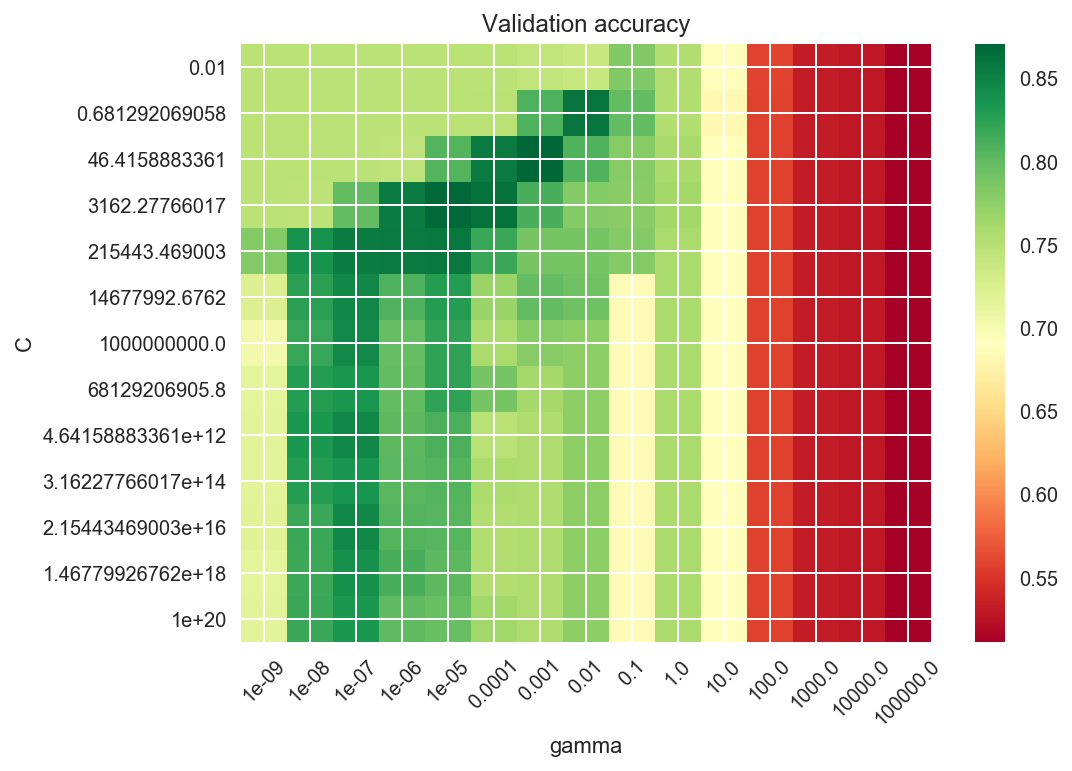

In [82]:
# Plotting Coarse grid

C_range = np.r_[np.logspace(-2, 20, 13)]
gamma_range = np.r_[np.logspace(-9, 5, 15)]
grid = GridSearchCV(sklearn.svm.SVC(C=1.0, kernel='rbf', class_weight='balanced', verbose=False, max_iter=60000),
                    {'C' : C_range, 'gamma': gamma_range},
                   scoring='roc_auc', cv=10, n_jobs=8)
grid.fit(X_learn, y_learn)

plotGridResults2D(C_range, gamma_range, 'C', 'gamma', grid.grid_scores_)
plt.show()

In [84]:
# Display result for Best C and Gamma Value

C_best = np.round(np.log10(grid.best_params_['C']))
gamma_best = np.round(np.log10(grid.best_params_['gamma']))
print('best C coarse:', C_best)
print('best gamma coarse:', gamma_best)

best C coarse: 2.0
best gamma coarse: -3.0


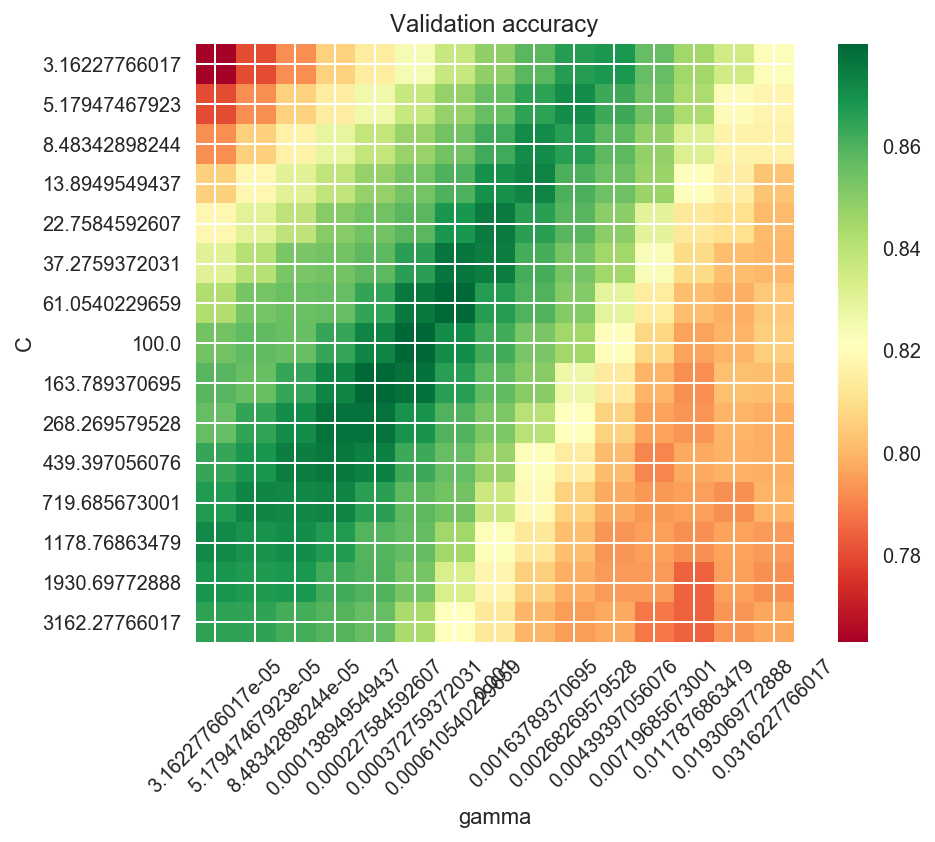

In [92]:
# Fine grid

C_range2 = np.r_[np.logspace(C_best - 1.5, C_best + 1.5, 15)]
gamma_range2 = np.r_[np.logspace(gamma_best - 1.5, gamma_best + 1.5, 15)]

gridFine = GridSearchCV(sklearn.svm.SVC(C=1.0, kernel='rbf', class_weight='balanced', verbose=False, max_iter=60000),
                    {'C' : C_range2, 'gamma': gamma_range2},
                   scoring='roc_auc', cv=10, n_jobs=8)
gridFine.fit(X_learn, y_learn)

plotGridResults2D(C_range2, gamma_range2, 'C', 'gamma', gridFine.grid_scores_)

In [93]:
# Final Fine Grid result for getting best parameters for Model (including C and Gamma Value)

bestClf = gridFine.best_estimator_
bestClf.probability = True
print(bestClf)

SVC(C=100.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.00037275937203149379,
  kernel='rbf', max_iter=60000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [94]:
#Fitting Train values and getting Prediction

bestClf.fit(X_train, y_train)
y_pred = bestClf.predict(X_test)

In [95]:
# Fetching Classification Report
print(sklearn.metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.84      0.91       564
        1.0       0.22      0.81      0.35        32

avg / total       0.95      0.84      0.88       596



In [96]:
# Fetching Confusion Matrix
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[472  92]
 [  6  26]]


In [97]:
# Getting Results from above model

y_score = bestClf.decision_function(X_test)
y_score

array([ -1.54914997e+00,  -1.34943372e+00,  -1.02973792e+00,
        -8.91380025e-01,   6.65512212e-01,   3.08383770e-01,
         3.49451396e-01,  -7.05113620e-01,  -1.17010722e+00,
         3.25577619e+00,  -2.66569965e-01,  -1.26720367e+00,
         4.24362505e-02,   3.18040726e-01,   9.22358407e-01,
        -1.62840270e+00,   2.79938205e-01,   1.11115559e+00,
        -3.70797228e+00,   1.60307503e-01,  -1.19272832e+00,
        -1.76072854e+00,  -1.79361240e+00,  -4.53021616e+00,
        -2.77469495e+00,  -6.37089904e-01,  -3.89536929e-01,
        -2.13236358e+00,  -4.92373998e-01,  -9.46519905e-01,
        -5.02172806e+00,  -2.73551201e+00,  -1.59001819e+00,
         4.64385799e-01,  -1.02086580e-01,  -4.47241730e-01,
        -1.30823739e+00,  -1.45567594e+01,   1.40215974e-01,
        -2.35344464e-01,  -1.00459285e+00,   1.63200459e+00,
        -6.57721946e-01,  -7.51483756e-01,   7.55131661e-01,
         4.71691564e-02,  -1.34235838e+00,  -6.62883053e-01,
        -8.97599439e-01,

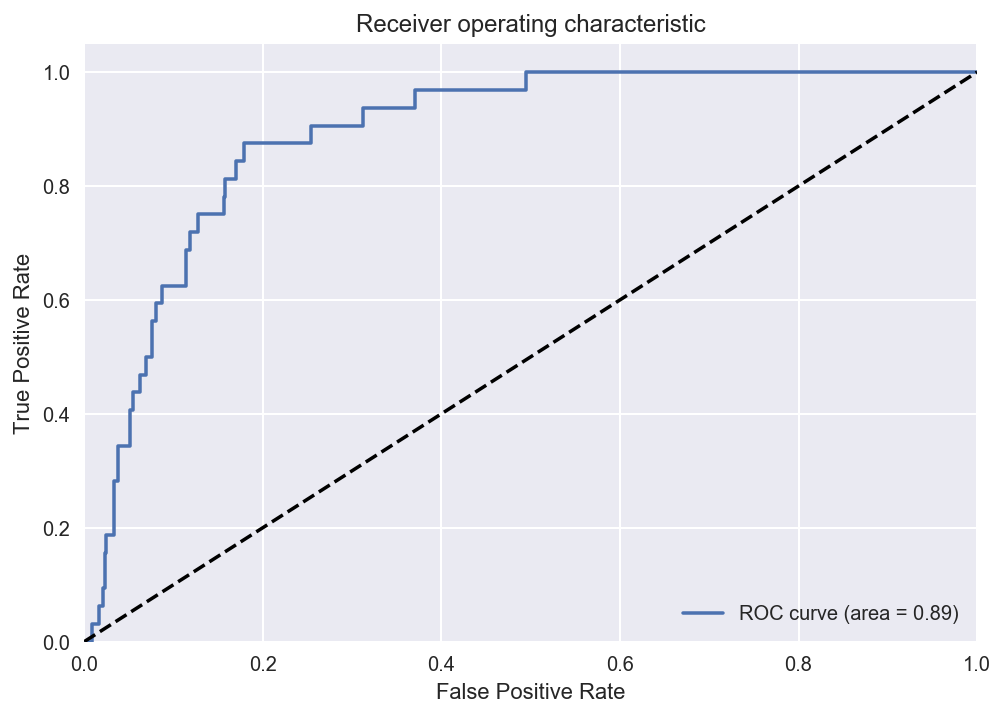

In [98]:
# Ploting ROC

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [99]:
# Fitting on learn Dataset and predicting final set

bestClf.fit(X_learn, y_learn)
y_final = bestClf.predict_proba(X_final)[:,1]
y_final

array([  4.03132148e-02,   1.00000010e-07,   7.63977036e-04, ...,
         2.15430994e-01,   2.26906686e-02,   4.09434283e-02])

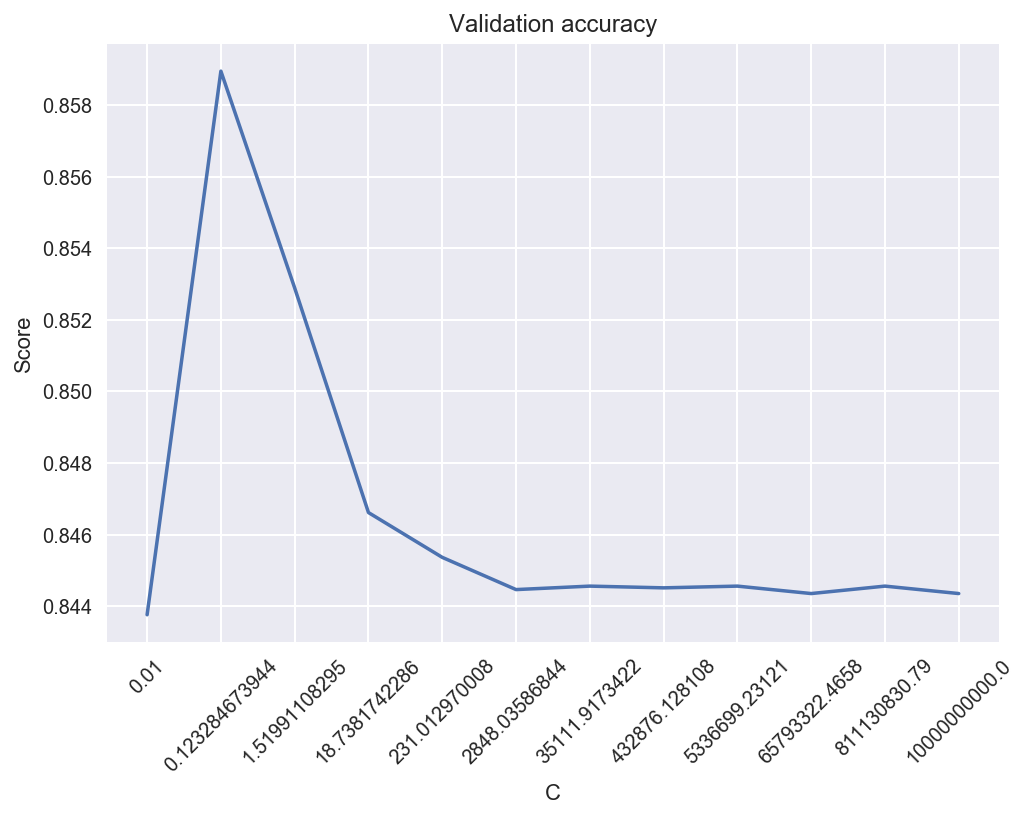

In [100]:
# Another Coarse grid with new value

C_range = np.r_[np.logspace(-2, 10, 12)]
grid = GridSearchCV(sklearn.svm.LinearSVC(C=1.0, penalty='l1', class_weight='balanced', dual=False, verbose=False, max_iter=3000),
                    {'C' : C_range},
                   cv=10, n_jobs=8, scoring='roc_auc')
grid.fit(X_learn, y_learn)

plotGridResults1D(C_range, 'C', grid.grid_scores_)
plt.show()

In [101]:
# Results for best C Score
C_best = np.round(np.log10(grid.best_params_['C']))
print('best C coarse:', C_best)

best C coarse: -1.0


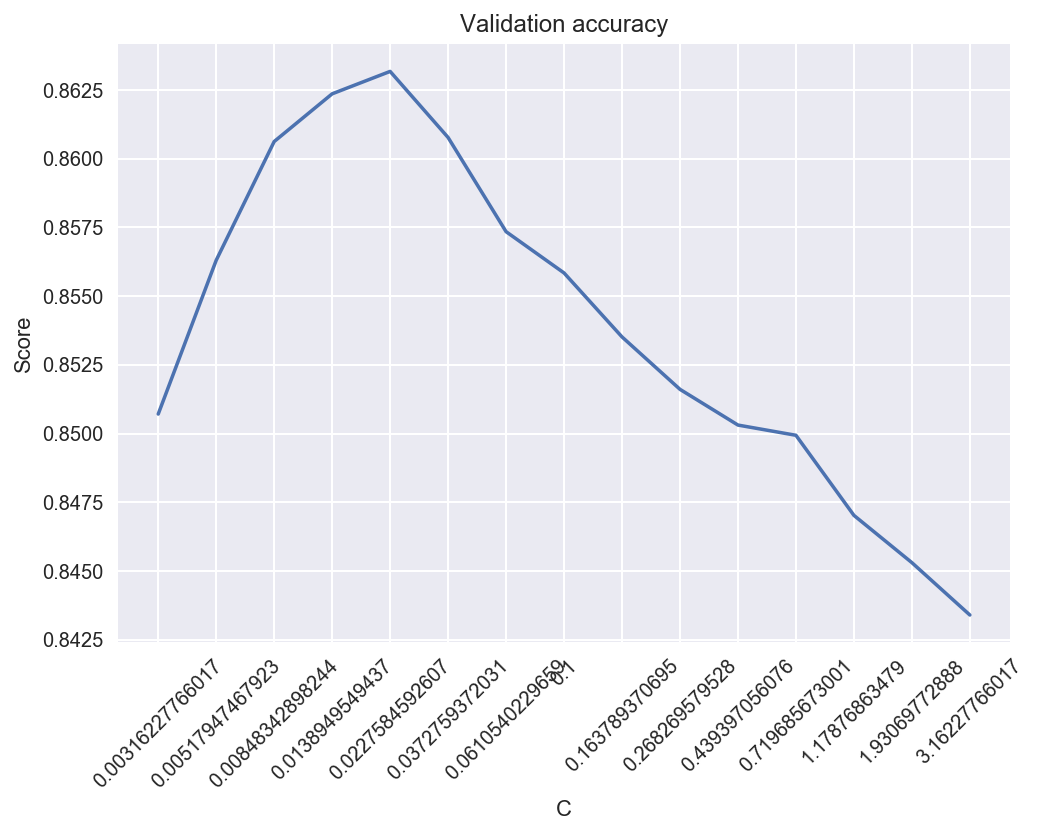

In [102]:
# Another Fine grid with new Value

C_range2 = np.r_[np.logspace(C_best - 1.5, C_best + 1.5, 15)]

gridFine = GridSearchCV(sklearn.svm.LinearSVC(C=1.0, class_weight='balanced', dual=False, verbose=False, max_iter=3000),
                    {'C' : C_range2},
                   cv=10, n_jobs=8, scoring='roc_auc')
gridFine.fit(X_learn, y_learn)

plotGridResults1D(C_range2, 'C', gridFine.grid_scores_)

In [103]:
# Final results

bestClf = gridFine.best_estimator_
bestClf.probability = True
print(bestClf)

LinearSVC(C=0.022758459260747887, class_weight='balanced', dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=3000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=False)


In [104]:
# Again Fitting on train Data

bestClf.fit(X_train, y_train)
y_pred = bestClf.predict(X_test)

# Classification report
print(sklearn.metrics.classification_report(y_test, y_pred))

# Confusion Matrix
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.82      0.89       564
        1.0       0.20      0.81      0.32        32

avg / total       0.94      0.82      0.86       596

[[461 103]
 [  6  26]]


In [105]:
# Predicting Result
y_score = bestClf.decision_function(X_test)
y_score

array([ -7.19536683e-01,  -6.57419922e-01,  -5.10446099e-01,
        -4.50137538e-01,   4.26134790e-01,   3.25746933e-01,
         3.35981833e-01,  -9.26552661e-02,  -6.68425208e-01,
         9.03404327e-01,  -8.76653254e-02,  -6.93392740e-01,
         2.26582737e-01,   1.89127546e-01,  -2.19187378e-01,
        -7.85464565e-01,   7.61721303e-02,   3.51026537e-01,
        -1.99760787e+00,   1.18542804e-01,  -3.93521658e-01,
        -8.64778452e-01,  -9.53098863e-01,  -2.47935243e+00,
        -1.61435723e+00,  -5.21240400e-01,   3.93574106e-02,
        -1.34507858e+00,  -8.90884976e-02,  -4.15702177e-01,
        -2.75007680e+00,  -1.28386493e+00,  -7.65035885e-01,
         5.10769511e-01,   2.07619399e-01,  -1.38540261e-01,
        -6.99090046e-01,  -7.54947591e+00,  -2.90728857e-02,
        -8.26356827e-02,  -5.27060935e-01,   8.35878461e-01,
        -1.21088202e-01,  -2.72032224e-01,   1.01260869e+00,
         2.23505543e-01,  -7.49962876e-01,  -2.42315681e-01,
        -4.59592872e-01,

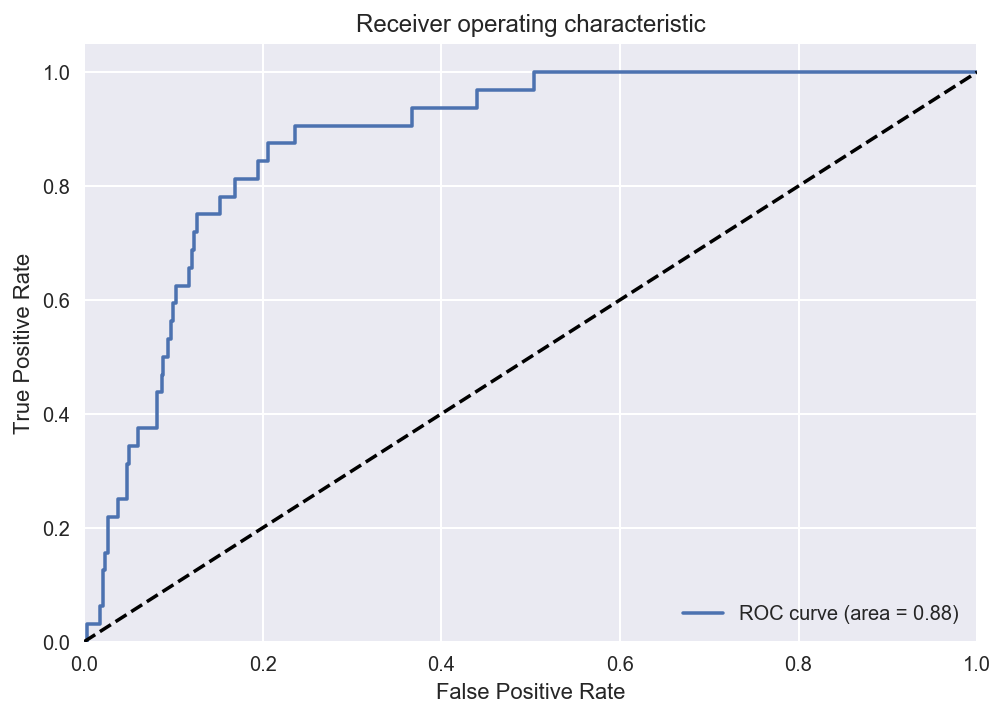

In [106]:
# Ploting New ROC

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

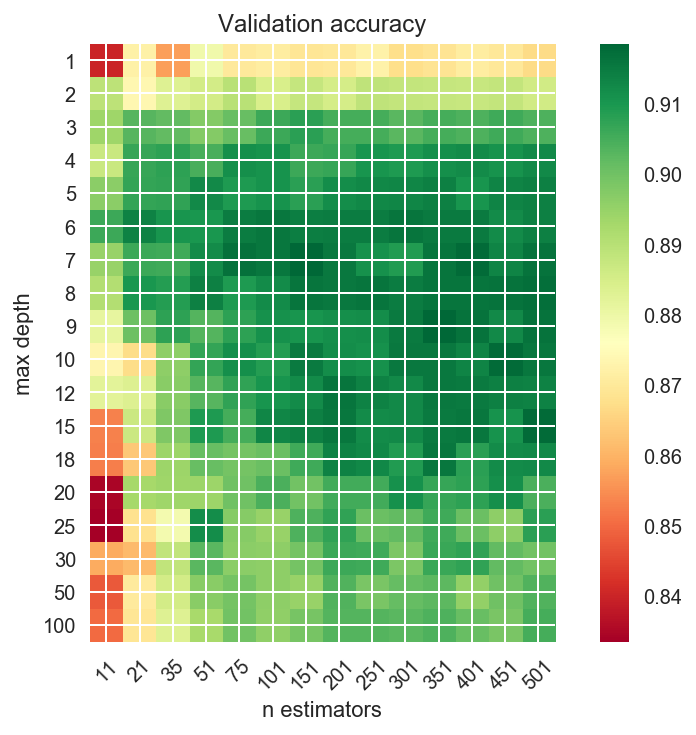

In [107]:
# Final Coarse grid, Final Grid Search with Random Forest

HP_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 25, 30, 50, 100])
HP2_range = np.array([11, 21, 35, 51, 75, 101, 151, 201, 251, 301, 351, 401, 451, 501])
grid = GridSearchCV(sklearn.ensemble.RandomForestClassifier(n_estimators=300, max_depth=None,
                                                                   max_features='auto', class_weight='auto'),
                    {'max_depth' : HP_range,
                    'n_estimators' : HP2_range},
                   cv=sklearn.cross_validation.StratifiedKFold(y_learn, 5), n_jobs=8, scoring='roc_auc')
grid.fit(X_learn, y_learn)

plotGridResults2D(HP_range, HP2_range, 'max depth', 'n estimators', grid.grid_scores_)
plt.show()

In [108]:
# Final results with best answer
bestClf = grid.best_estimator_
print(bestClf)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=351, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [109]:
# Providing Value to RFC, This is just random value we Entered no specific reason for that
bestClf = sklearn.ensemble.RandomForestClassifier(max_depth=15, n_estimators=251,
                                        max_features='auto', class_weight='balanced')

In [110]:
# Learn on train for test and predict Result
bestClf.fit(X_train, y_train)
y_pred = bestClf.predict(X_test)
y_pred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [111]:
# Classification report
print(sklearn.metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97       564
        1.0       0.71      0.16      0.26        32

avg / total       0.94      0.95      0.94       596



In [112]:
# Confusion Matrix
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[562,   2],
       [ 27,   5]])

In [113]:
# Predicting Final scores
y_score = bestClf.predict_proba(X_test)[:,1]
y_score

array([ 0.        ,  0.        ,  0.01150712,  0.        ,  0.30258875,
        0.01195219,  0.2407308 ,  0.        ,  0.05232788,  0.28795925,
        0.17863183,  0.00577391,  0.43739123,  0.28301291,  0.28554723,
        0.00398406,  0.10709046,  0.31066021,  0.        ,  0.03158267,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00796813,  0.03568939,  0.00796813,  0.01586779,  0.03202374,
        0.        ,  0.        ,  0.06818807,  0.08366534,  0.34939708,
        0.05577689,  0.        ,  0.        ,  0.15537645,  0.        ,
        0.        ,  0.42388086,  0.00398406,  0.01223342,  0.14405203,
        0.00796813,  0.00398406,  0.00562092,  0.02390438,  0.08995452,
        0.        ,  0.        ,  0.04607423,  0.00953712,  0.00398406,
        0.05134092,  0.00398406,  0.        ,  0.        ,  0.00577391,
        0.09005251,  0.        ,  0.        ,  0.00398406,  0.        ,
        0.10487659,  0.        ,  0.09163347,  0.00398406,  0.  

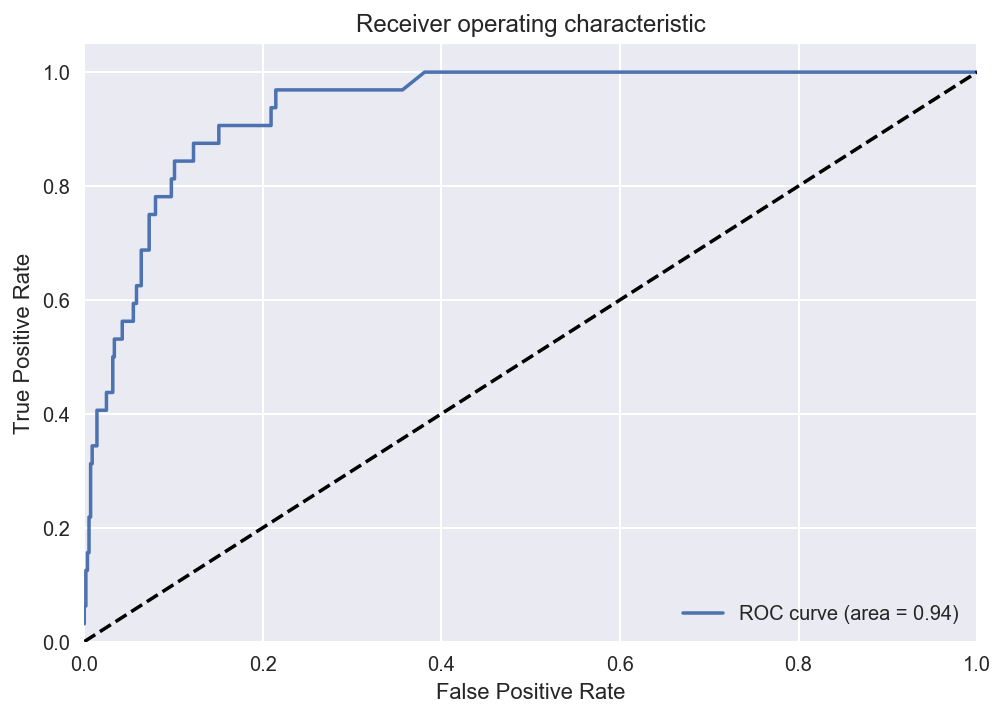

In [114]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [125]:
# Fitting into final model and Predicting results
bestClf.fit(X_learn, y_learn)
y_final = bestClf.predict_proba(X_final)[:,1]
y_final

array([ 0.04361831,  0.        ,  0.        , ...,  0.21793177,
        0.01647908,  0.39471416])

In [116]:
# Creating a DataFrame and Storing Results into CSV

bidders_y_final = pd.DataFrame(np.c_[X_ids[i_final], y_final], columns=['bidder_id', 'prediction'])
bidders_y_final[['prediction']] = bidders_y_final[['prediction']].astype(float)
bidders_list = pd.read_csv('../PROJECT/test.csv', header=0)
bidders_list_final = pd.merge(bidders_list[['bidder_id']], bidders_y_final, how='left').fillna(0.0)

f = open('predictions_RF_2.0.csv', 'w', encoding='utf-8-sig')
f.write(bidders_list_final.to_csv(index=False))
f.close()

In [118]:
# Fetching Result CSV and Display the Results Here!

Final_Result = pd.read_csv('../PROJECT/predictions_RF_2.0.csv')
Final_Result

,bidder_id,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0.000000
1,a921612b85a1494456e74c09393ccb65ylp4y,0.003984
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0.051787
3,eaf0ed0afc9689779417274b4791726cn5udi,0.000000
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0.011952
5,d4aed439bdc854a56fc6cc3bdb986775w7hxw,0.023812
6,ed591299b162a19ff77f0479495831b31hl1q,0.000000
7,eebdee08b0f67283126ef60307f49680sb9va,0.059456
8,6887f0abc4eb4c79eb0e23c48ceea186vjfih,0.165596
9,37eb6e2979e66d4ce29a74ac1c8bc6a5lqs6t,0.007447
